In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import gzip
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

## 1. 데이터 준비

In [3]:
with gzip.open('data/fashion-mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    mnist_data = np.frombuffer(f.read(), np.uint8, offset = 16)
    mnist_data = mnist_data.reshape(-1, 784)

In [5]:
# 정규화
mnist_data = mnist_data / 255

pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


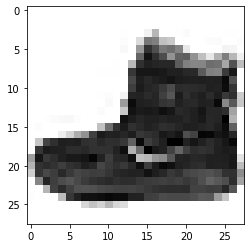

In [6]:
plt.imshow(mnist_data[0].reshape(28, 28), cmap = cm.gray_r)
plt.show()

In [7]:
with gzip.open('data/fashion-mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    mnist_label = np.frombuffer(f.read(), np.uint8, offset = 8)
    
mnist_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
mnist_label = np.array(mnist_label).astype(int)
mnist_label

array([9, 0, 0, ..., 3, 0, 5])

In [10]:
print(type(mnist_data))
print(type(mnist_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
train_size = 5000
test_size = 500

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(
    mnist_data, mnist_label, train_size = train_size, test_size = test_size)

In [12]:
train_X = train_X.reshape((len(train_X), 1, 28, 28))
test_X = test_X.reshape((len(test_X), 1, 28, 28))

## 2. 텐서 생성

In [13]:
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

print(train_X.shape)
print(train_Y.shape)

torch.Size([5000, 1, 28, 28])
torch.Size([5000])


In [14]:
train = TensorDataset(train_X, train_Y)

print(train[0])

train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.3020, 0.3176, 0.3098, 0.2863,
          0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.6471, 0.7608, 0.5020, 0.5647, 0.7922,
          0.4353, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0549, 0.0314, 0.4706, 0.9176, 0.7765, 0.8784, 0.9098,
          0.2824, 0.0824, 0.0471, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0745,
          0.1843, 0.2471, 0.1882, 0.0353, 0.8118, 0.5843, 0.7373, 0.5843,
          0.0157, 0.2157, 0.2588, 0.2000, 0.0941, 0.0000

## 3. 신경망

In [15]:
# 신경망
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
#         합성곱층
        self.conv1 = nn.Conv2d(1, 6, 5) # 입력 채널 수, 출력 채널 수, 필터 크기
        self.conv2 = nn.Conv2d(6, 16, 5)
        
#         전결합층
        self.fc1 = nn.Linear(256, 64) # 256 = (((28 - 5 + 1) / 2) -5 + 1) / 2 * (((28 - 5 + 1) / 2) - 5 + 1) / 2 * 16
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2) # 풀링 영역 크기
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net()

## 4. 학습

In [16]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

for epoch in range(1000):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        train_x, train_y = Variable(train_x), Variable(train_y)
        optimizer.zero_grad()
        output = model(train_x)
        loss = criterion(output, train_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.data
    
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

C:\Users\14\.conda\envs\pt\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


100 tensor(22.7138)
200 tensor(16.6765)
300 tensor(12.1052)
400 tensor(8.7162)
500 tensor(5.6728)
600 tensor(3.3725)
700 tensor(2.4667)
800 tensor(1.1868)
900 tensor(0.6662)
1000 tensor(0.2341)


In [17]:
test_x, test_y = Variable(test_X), Variable(test_Y)

result = torch.max(model(test_x).data, 1)[1]

accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())

accuracy

C:\Users\14\.conda\envs\pt\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


0.862